In [79]:
%run "../../PyUtils/common.ipynb"
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.gaussian_process import GaussianProcess
from sklearn import linear_model
from sklearn import cross_validation
from sklearn import ensemble
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
#from statsmodels.regression.quantile_regression import QuantReg
#import statsmodels.formula.api as smf
from sklearn.model_selection import learning_curve
from sklearn.kernel_ridge import KernelRidge
from sklearn.metrics import r2_score
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import GridSearchCV

han1="http://www.smartconnectedhealth.org/aura/webroot/db.jsp?q=SELECT%20*%20FROM%20patient_data_table";
hand="http://www.smartconnectedhealth.org/aura/webroot/db.jsp?q=SELECT%20*%20FROM%20hand"
kimj="http://www.smartconnectedhealth.org/aura/webroot/db.jsp?q=SELECT%20*%20FROM%20kimj";
leeh="http://www.smartconnectedhealth.org/aura/webroot/db.jsp?q=SELECT%20*%20FROM%20leeh";
sony="http://www.smartconnectedhealth.org/aura/webroot/db.jsp?q=SELECT%20*%20FROM%20sony";
kuky="http://www.smartconnectedhealth.org/aura/webroot/db.jsp?q=SELECT%20*%20FROM%20kuky";

fileName = hand;

#dfOriginal = LoadDataSet(fileName, checkForDateTime=False);
#displayDFs (dfOriginal, maxrows=3 )
#for c in dfOriginal.columns: print (c,  end=', ')
import imp
imp.find_module("arch")
from arch.univariate import ARX
df = LoadDataSet("hand-save.csv", checkForDateTime=False);
df

<IPython.core.display.Javascript object>

,Date,pefmax,so2,co,o3,no2,pm10,temperaturec,rainfallmm,windspeedms,precipitationpercent,vaporpressurehpa,dewpointtemperaturec,airpressurehpa,sealevelpressurehpa,groundtemperaturec,winddirection,tmax,amax,pmax,tmin,amin,pmin,tmode,amode,pmode,tmaxlesstmin,amaxlessamin,pmaxlesspmin,so2max,so2maxtime,so2min,so2mintime,comax,comaxtime,comin,comintime,o3max,o3maxtime,o3min,o3mintime,no2max,no2maxtime,no2min,no2mintime,pm10max,pm10maxtime,pm10min,pm10mintime
0,1419362940000000000,339.000,0.188,23.400,0.063,1.272,892.000,2.000,0.000,1.300,65.000,4.600,-3.900,1020.000,1024.300,-0.100,70.000,3.700,1023.900,97.000,-6.900,1000.000,56.000,-5.000,1023.000,96.000,10.600,23.900,41.000,0.011,13.000,0.004,19.000,1.500,23.000,0.400,19.000,0.005,19.000,0.002,21.000,0.067,10.000,0.040,19.000,48.000,13.000,13.000,19.000
1,1419406800000000000,319.000,0.196,19.900,0.077,1.176,1072.000,1.900,0.000,0.300,83.000,5.800,-0.600,1017.300,1021.600,-0.400,0.000,3.700,1023.900,96.000,-6.600,1000.000,56.000,1.900,1023.900,65.000,10.300,23.900,40.000,0.012,21.000,0.006,7.000,1.400,10.000,0.600,18.000,0.009,6.000,0.002,7.000,0.067,10.000,0.031,6.000,55.000,21.000,28.000,7.000
2,1419444360000000000,316.000,0.214,19.800,0.151,1.042,1446.000,2.100,0.000,2.200,56.000,4.000,-5.700,1018.200,1022.500,-0.100,290.000,7.900,1020.300,87.000,0.500,1000.000,56.000,1.900,1017.100,64.000,7.400,20.300,31.000,0.017,15.000,0.005,7.000,1.800,9.000,0.500,17.000,0.021,17.000,0.002,18.000,0.064,9.000,0.031,6.000,121.000,15.000,40.000,7.000
3,1419489660000000000,326.000,0.180,18.400,0.378,0.750,1177.000,-3.600,0.000,1.200,66.000,3.100,-9.000,1023.900,1028.300,-3.900,290.000,7.900,1023.800,86.000,-3.700,1000.000,55.000,5.600,1017.100,58.000,11.600,23.800,31.000,0.017,15.000,0.004,22.000,1.800,9.000,0.200,18.000,0.025,4.000,0.002,8.000,0.064,9.000,0.012,4.000,121.000,15.000,11.000,19.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1209,1475695260000000000,214.000,0.063,10.300,0.460,0.490,584.000,20.900,1.485,1.400,86.000,21.200,18.400,1008.200,1012.200,19.900,270.000,26.500,1010.300,95.000,17.200,1000.000,53.000,21.700,1004.000,67.000,9.300,10.300,42.000,0.003,19.000,0.002,2.000,0.600,21.000,0.400,20.000,0.044,15.000,0.002,21.000,0.038,20.000,0.008,3.000,42.000,15.000,10.000,2.000
1210,1475733600000000000,229.000,0.067,10.500,0.632,0.407,804.000,14.400,1.485,1.700,83.000,13.600,11.500,1015.900,1020.000,15.000,320.000,26.500,1015.100,95.000,15.000,1000.000,53.000,19.500,1003.900,77.000,11.500,15.100,42.000,0.003,10.000,0.002,6.000,0.500,9.000,0.400,6.000,0.044,15.000,0.005,9.000,0.038,20.000,0.008,4.000,47.000,24.000,13.000,6.000
1211,1475777460000000000,230.000,0.072,10.900,0.652,0.388,920.000,18.800,1.485,2.100,60.000,12.900,10.800,1017.800,1021.800,18.000,290.000,23.300,1017.800,93.000,13.800,1000.000,44.000,19.500,1017.800,84.000,9.500,17.800,49.000,0.003,18.000,0.003,18.000,0.600,16.000,0.400,18.000,0.045,16.000,0.007,8.000,0.038,20.000,0.008,4.000,48.000,15.000,27.000,9.000
1212,1475824680000000000,271.000,0.072,11.400,0.390,0.548,877.000,17.300,1.485,2.100,83.000,16.300,14.300,1018.500,1022.500,16.300,110.000,23.300,1019.200,88.000,13.800,1000.000,44.000,21.500,1017.800,84.000,9.500,19.200,44.000,0.004,20.000,0.002,3.000,0.600,16.000,0.300,18.000,0.045,16.000,0.002,22.000,0.036,22.000,0.013,11.000,48.000,15.000,20.000,19.000


In [93]:
from bs4 import BeautifulSoup

def readXML(file, tag):
    with open(f,"r") as infile:
        contents = infile.read()
    soup = BeautifulSoup(contents, 'xml')
    m = soup.find_all(tag)
    rows = []
    for k in m:
        d = {};
        for j in k.children:
            if ( j is None or j.name is None): continue;
            d[j.name] = j.getText()
        rows.append(d)
    df = pd.DataFrame(rows)        
    return df;
    
f='hand_f0.0_0.5.inv.xml'
dfinv=readXML(f,tag='Invariant')
dfinv = dfinv['yName,uName,fitness,correlation,validity,theta,n,m,k,slope,threshold'.split(',')]
#HTML(dfinv.to_html())
dfinv

,yName,uName,fitness,correlation,validity,theta,n,m,k,slope,threshold
0,pmax,pmode,0.6698841181447526,1.0,1.0,"-0.9557353886974136,0.6274513647772721,-42.634...",1,0,0,0.0,1099.564707186555
1,pmin,pmax,0.9651868478701102,1.0,1.0,"-0.8368848731330445,-0.04049563719389936,122.4...",0,1,0,0.0,67.46088735197566
2,tmode,dewpointtemperaturec,0.6480027341759365,1.0,1.0,"-0.4001582535607091,-0.14408344056198932,0.150...",2,1,0,0.0,15.422526034767015
3,tmax,tmode,0.6634785117456387,1.0,1.0,"0.5551473631571344,0.41715694759982463,6.41627...",0,1,0,0.0,12.667833088311028
...,...,...,...,...,...,...,...,...,...,...,...
51,sealevelpressurehpa,airpressurehpa,0.9887103663129803,1.0,1.0,"-0.6663306679456471,-0.013880559721261546,1.02...",2,1,0,0.0,0.28582585365138585
52,amaxlessamin,airpressurehpa,0.6810018583417856,1.0,1.0,"-0.8740624868649358,0.16710024994296785,0.2752...",2,0,0,0.0,15.81996834523151
53,tmin,airpressurehpa,0.5821041244166227,1.0,1.0,"-0.8954172737443393,-0.04273910917184819,-0.07...",2,0,0,0.0,11.54886799340558
54,groundtemperaturec,airpressurehpa,0.5733565431983305,1.0,1.0,"-0.15430907901242008,-0.7946938522378026,-0.05...",2,0,0,0.0,17.405600945450157


In [198]:
n=res.resid[1:]**2
d=(y[1:]+mean(y[1:]))**2
r = sqrt((n)/(d))
print(n.shape, d.shape, r)

(1212,) (1212,) 1      0.012
2      0.005
3      0.021
4      0.022
        ... 
1209   0.000
1210   0.003
1211   0.018
1212   0.025
Length: 1212, dtype: float64


AR-X(constant: yes, lags: 1, no. of exog: 1, volatility: Constant Variance, distribution: Normal distribution) Const      -42.635
pmax[1]      0.956
x0           0.627
sigma2    1920.225
Name: params, dtype: float64

 1920.2245756910415 0.715267255188 0.0810727359679 1525.55307536 18817.0913088 43.820367133229745 1920.2245756910415 0.993400638611 
 [[ 1.    0.91]
 [ 0.91  1.  ]]


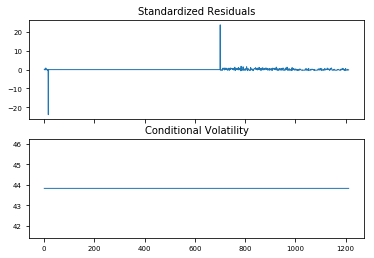

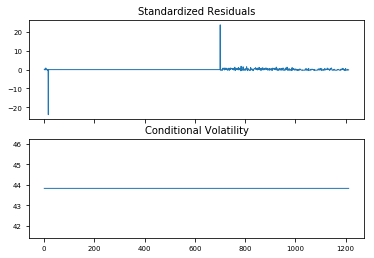

In [203]:
y=df.pmax
#y=df.pmin
x=df.pmode
xx=np.matrix(x).transpose()

arx = ARX(y,xx, lags=1)

res = arx.fit()
print(arx, res.params)

n=sqrt(sum(res.resid[1:]**2))
d=sqrt(sum((y-mean(y))**2))
r=n/d
f=1-sqrt(r)
yp = y + res.resid
yp=yp.fillna(0)
r2 = sklearn.metrics.r2_score(y,yp)

print("\n", var(res.resid), f, r,n,d,std(res.resid), var(res.resid), r2,"\n", np.corrcoef(x,y))

res.plot()

In [92]:
x.shape[0]

1213